In [1]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# load dataset

In [2]:
books_path = r"C:\Users\Administrator\Downloads\final_dataset_V3.csv"
books = pd.read_csv(books_path)
books = pd.DataFrame(books, columns=['title','genre','summary'])


In [3]:
books

,title,genre,summary
0,Going Wrong,crime,"When he was a young man, Guy Curran led a loc..."
1,The Screwtape Letters,fantasy,"In The Screwtape Letters, C.S. Lewis provides..."
2,King of Foxes,fantasy,"An exceptionally skilled swordsman, young Tal..."
3,If You Could See Me Now,horror,"The novel tells the story of Miles Teagarden,..."
4,Shatter Me,romance,I have a curse\nI have a gift\n\nI am a monste...
...,...,...,...
4995,Soldier's Heart,history,"(Conflict, Rising Action, Climax, Falling Act..."
4996,The Gifts of Imperfection,psychology,In this groundbreaking New York Times best sel...
4997,Talking to Strangers: What We Should Know Abou...,psychology,"Malcolm Gladwell, host of the podcast Revision..."
4998,Why We Sleep: Unlocking the Power of Sleep and...,psychology,Alternate cover edition of ISBN 9781501144318....


# Visualization on genre

In [4]:
books.groupby('genre').count()

,title,summary
genre,,
crime,500,500
fantasy,500,500
history,500,500
horror,500,500
psychology,500,500
romance,500,500
science,500,500
sports,500,500
thriller,500,500


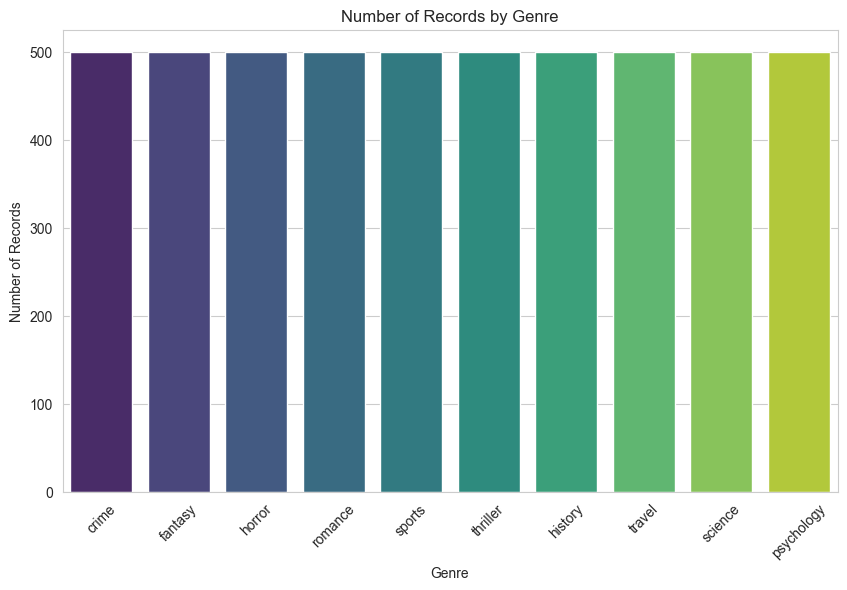

In [5]:
# Convert the dataset into a DataFrame
books = pd.DataFrame(books)

# Count the number of records for each genre
genre_counts = books['genre'].value_counts()

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Number of Records")
plt.title("Number of Records by Genre")
plt.xticks(rotation=45)
plt.show()


# Words Frequency Visualization

most common used words in summry.




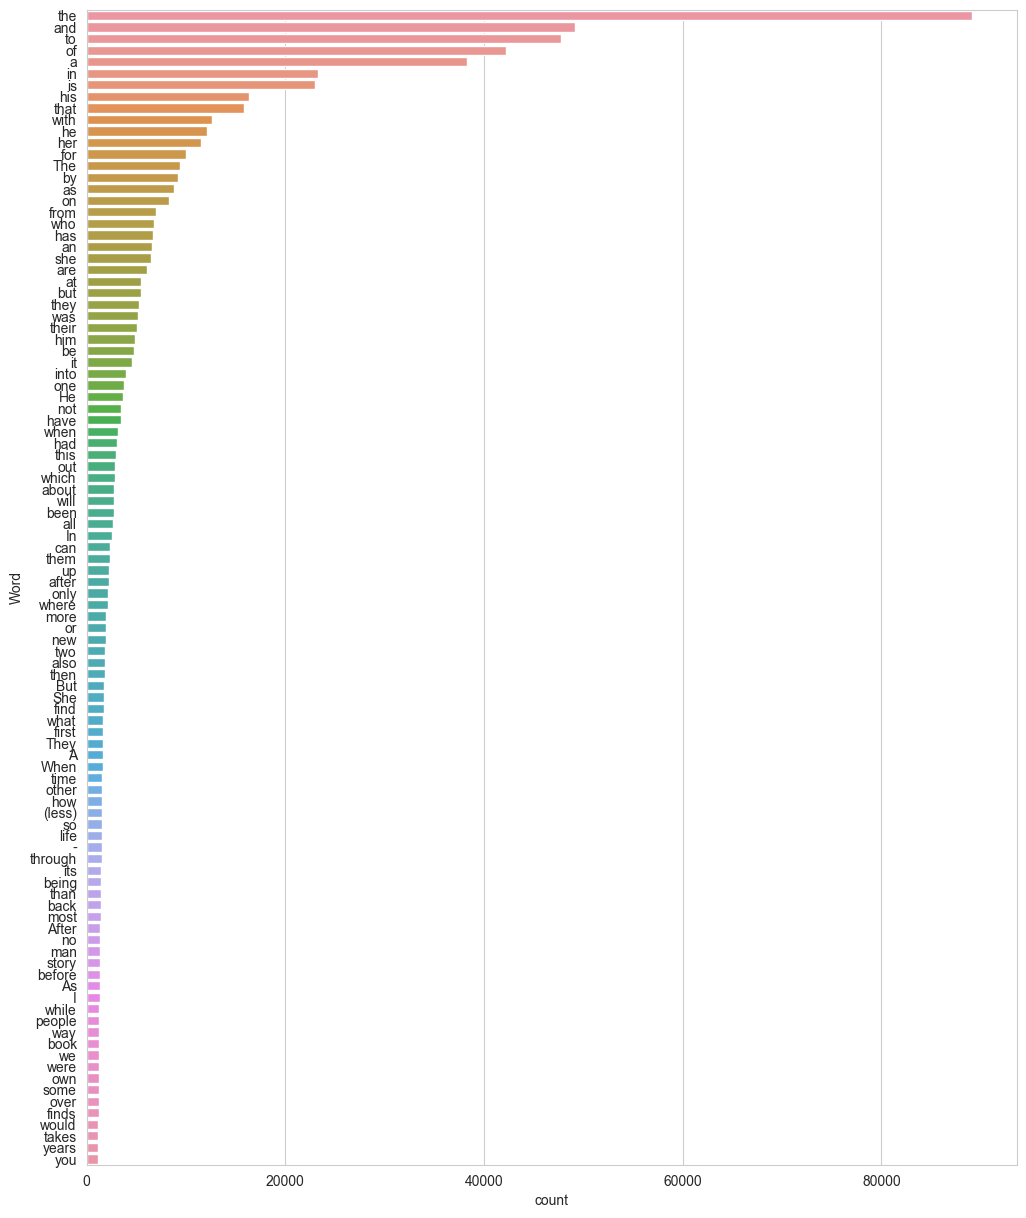

In [6]:
def freqwords(x, terms): 
    print("most common used words in summry.\n\n")
    allwords = ' '.join([text for text in x]) 
    allwords = allwords.split() 
    fdist = nltk.FreqDist(allwords) 
    wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
    d = wordsdf.nlargest(columns="count", n = terms)  
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()

freqwords(books['summary'], 100)

# data preprocessing


## text cleaning

In [7]:
def clean(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

books.loc[:,'summary']=books.loc[:,'summary'].apply(lambda x: clean(x))

In [8]:
books

,title,genre,summary
0,Going Wrong,crime,when he was a young man guy curran led a local...
1,The Screwtape Letters,fantasy,in the screwtape letters c s lewis provides a ...
2,King of Foxes,fantasy,an exceptionally skilled swordsman young tal h...
3,If You Could See Me Now,horror,the novel tells the story of miles teagarden a...
4,Shatter Me,romance,i have a curse i have a gift i am a monster im...
...,...,...,...
4995,Soldier's Heart,history,conflict rising action climax falling action a...
4996,The Gifts of Imperfection,psychology,in this groundbreaking new york times best sel...
4997,Talking to Strangers: What We Should Know Abou...,psychology,malcolm gladwell host of the podcast revisioni...
4998,Why We Sleep: Unlocking the Power of Sleep and...,psychology,alternate cover edition of isbn neuroscientist...


## cleaning

In [9]:
#removing any stopword from the text
def removestopwords(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
    re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
    no_stopword_text = re_stop_words.sub(" ", text)
    return no_stopword_text

books['summary'] = books['summary'].apply(lambda x: removestopwords(x))

In [10]:
books

,title,genre,summary
0,Going Wrong,crime,young man guy curran led local street gan...
1,The Screwtape Letters,fantasy,screwtape letters c lewis provides series ...
2,King of Foxes,fantasy,exceptionally skilled swordsman young tal haw...
3,If You Could See Me Now,horror,novel tells story miles teagarden widowed ...
4,Shatter Me,romance,curse gift monster im human touch ...
...,...,...,...
4995,Soldier's Heart,history,conflict rising action climax falling action ...
4996,The Gifts of Imperfection,psychology,groundbreaking new york times best seller dr...
4997,Talking to Strangers: What We Should Know Abou...,psychology,malcolm gladwell host podcast revisionist hi...
4998,Why We Sleep: Unlocking the Power of Sleep and...,psychology,alternate cover edition isbn neuroscientist ...


## word -> original 

In [11]:
#stem each word
stemmer = PorterStemmer()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['summary'] = books['summary'].apply(lambda x: stemming(x))

In [12]:
books

,title,genre,summary
0,Going Wrong,crime,young man guy curran led local street gang dea...
1,The Screwtape Letters,fantasy,screwtap letter c lewi provid seri lesson impo...
2,King of Foxes,fantasy,except skill swordsman young tal hawkin surviv...
3,If You Could See Me Now,horror,novel tell stori mile teagarden widow english ...
4,Shatter Me,romance,curs gift monster im human touch lethal touch ...
...,...,...,...
4995,Soldier's Heart,history,conflict rise action climax fall action resolu...
4996,The Gifts of Imperfection,psychology,groundbreak new york time best seller dr bren ...
4997,Talking to Strangers: What We Should Know Abou...,psychology,malcolm gladwel host podcast revisionist histo...
4998,Why We Sleep: Unlocking the Power of Sleep and...,psychology,altern cover edit isbn neuroscientist sleep ex...


# Visualization after cleaning

most common used words in summry.




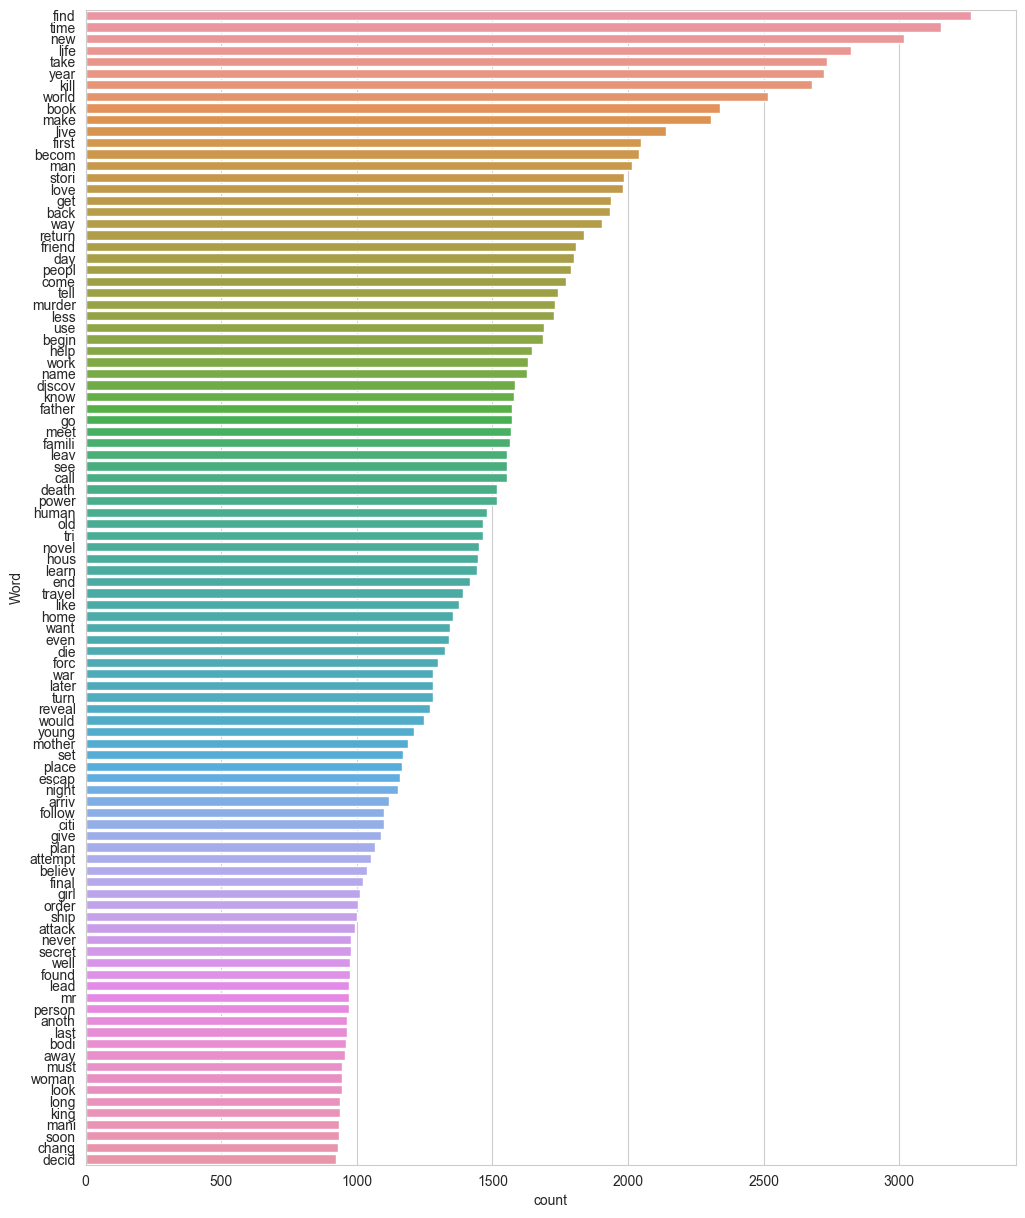

In [13]:
freqwords(books['summary'], 100)

# label encoding

In [14]:
# Encoding labels
LE = LabelEncoder()
y = LE.fit_transform(books['genre'])

In [15]:
unique_labels = np.unique(y)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['crime', 'fantasy', 'history', 'horror', 'psychology', 'romance',
       'science', 'sports', 'thriller', 'travel'], dtype=object)

# Tokenization

## word -> number

In [17]:
# Tokenization and Vectorization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(books['summary'])
X = tokenizer.texts_to_sequences(books['summary'])
X = pad_sequences(X, maxlen=200)

# spliting

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Word2Vec model

In [19]:
# Convert sequences back to sentences
sentences = tokenizer.sequences_to_texts(X_train)
# Split sentences into lists of words
sentences = [sentence.split() for sentence in sentences]
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, sg=0)


# Cnn model

In [20]:

# Define hyperparameters
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for padding token

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=len(books['genre'].unique()), activation='softmax'))
model.add(Dropout(0.2))

# Compile the model with 'sparse_categorical_crossentropy' as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.1443 - loss: 4.7314 - val_accuracy: 0.3914 - val_loss: 2.2417
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5747 - loss: 4.7779 - val_accuracy: 0.5057 - val_loss: 2.1532
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6176 - loss: 4.7370 - val_accuracy: 0.5200 - val_loss: 1.9404
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5567 - loss: 4.4582 - val_accuracy: 0.5029 - val_loss: 1.6283
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5274 - loss: 4.2701 - val_accuracy: 0.6000 - val_loss: 1.3549
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5867 - loss: 3.8223 - val_accuracy: 0.6414 - val_loss: 1.1536
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6787 - loss: 3.3978 - val_accuracy: 0.6700 - val_loss: 1.0011
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7147 - loss: 3.0674 - val_accuracy: 0.6886 - v

# learning curve

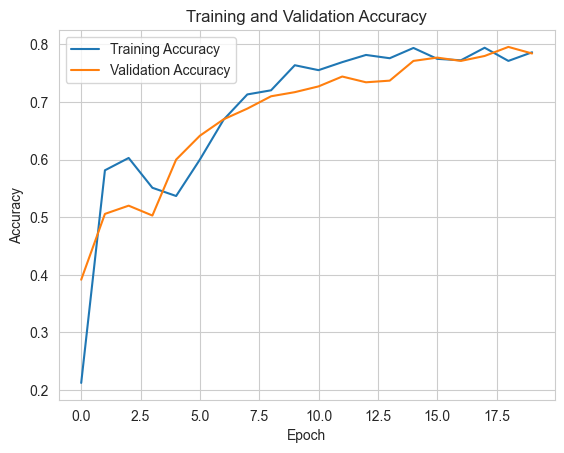

In [21]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# test the model

## prediction 

In [22]:
# Function to predict genre for a given summary
def predict_genre(summary):
    summary_sequence = tokenizer.texts_to_sequences([summary])
    summary_sequence = pad_sequences(summary_sequence, maxlen=200)  # Assuming max_sequence_length is 200
    predicted_probs = model.predict(summary_sequence)[0]
    predicted_genre_index = np.argmax(predicted_probs)
    predicted_genre = LE.inverse_transform([predicted_genre_index])[0]
    return predicted_genre


## output prediction

In [23]:
# Variables to count correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

for _ in range(500):  # Adjust the range as needed
    idx = random.randint(0, len(X_test) - 1)
    title = books['title'].iloc[idx]
    summary = books['summary'].iloc[idx]
    predicted_genre = predict_genre(summary)
    actual_genre = books['genre'].iloc[idx]
    
    print("\nBook:", title)
    print("Predicted Genre:", predicted_genre)
    print("Actual Genre:", actual_genre)
    
    # Check if prediction is correct
    if predicted_genre == actual_genre:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Print counts of correct and incorrect predictions
print("\nNumber of Correct Predictions:", correct_predictions)
print("Number of Incorrect Predictions:", incorrect_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Book: The Undiscovered Self
Predicted Genre: psychology
Actual Genre: psychology
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Book: The Dead of Jericho
Predicted Genre: crime
Actual Genre: crime
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Book: Kandide and the Secret of the Mists
Predicted Genre: fantasy
Actual Genre: fantasy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Book: Taking a Shot
Predicted Genre: sports
Actual Genre: sports
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Book: The Year of Living Danishly: My Twelve Months Unearthing the Secrets of the World's Happiest Country
Predicted Genre: travel
Actual Genre: travel
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Book: The Firm
Predicted Genre: romance
Actual Genre: romance
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Book: The Golden Age
Predicted Genre: history
Actual Genre: history
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Book: Rose Madder
Predicted Genre: horror
Actual Genre: thriller
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

# visualization for the model

## Confusion Matrix


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


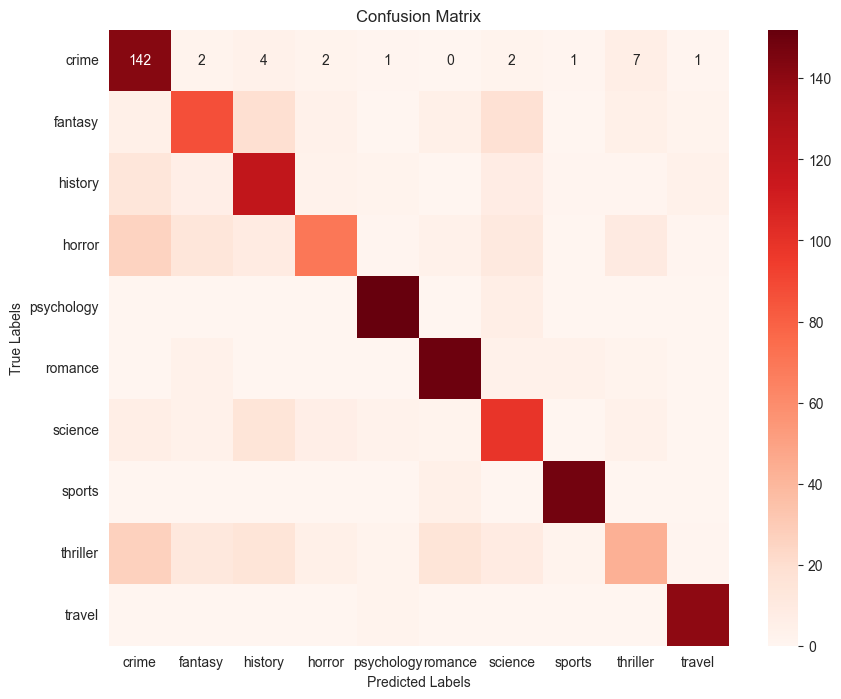

In [27]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=LE.classes_, yticklabels=LE.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Classification Report


In [28]:
# Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=LE.classes_))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

       crime       0.64      0.88      0.74       162
     fantasy       0.67      0.60      0.64       145
     history       0.66      0.75      0.70       158
      horror       0.78      0.48      0.59       146
  psychology       0.93      0.96      0.94       159
     romance       0.83      0.91      0.87       164
     science       0.63      0.71      0.66       140
      sports       0.95      0.97      0.96       153
    thriller       0.60      0.33      0.42       131
      travel       0.94      0.99      0.96       142

    accuracy                           0.77      1500
   macro avg       0.76      0.76      0.75      1500
weighted avg       0.77      0.77      0.76      1500



# save trained model

In [29]:
model.save("cbow_F1.h5")